In [1]:
import matplotlib.pyplot as plt
import nest as sim
import numpy as np
sim.ResetKernel()

sim_len = 4000


# srt_tm = 2000.
# stp_tm = 8000.

In [2]:
def plotSpks(ax,t,s): # define function to plot spikes in a common way
    ax.plot(t,s,'.')
    ax.set_ylabel('Neuron')
    ax.set_xlabel('Time (ms)')
    ax.set_xlim([0,sim_len])

In [3]:
sim.SetDefaults("stdp_synapse",{"tau_plus": 15.0})

syn_dict = {"model": "stdp_synapse", "alpha": 0.5,"weight": 150.,'Wmax':600.,'delay': 1.}

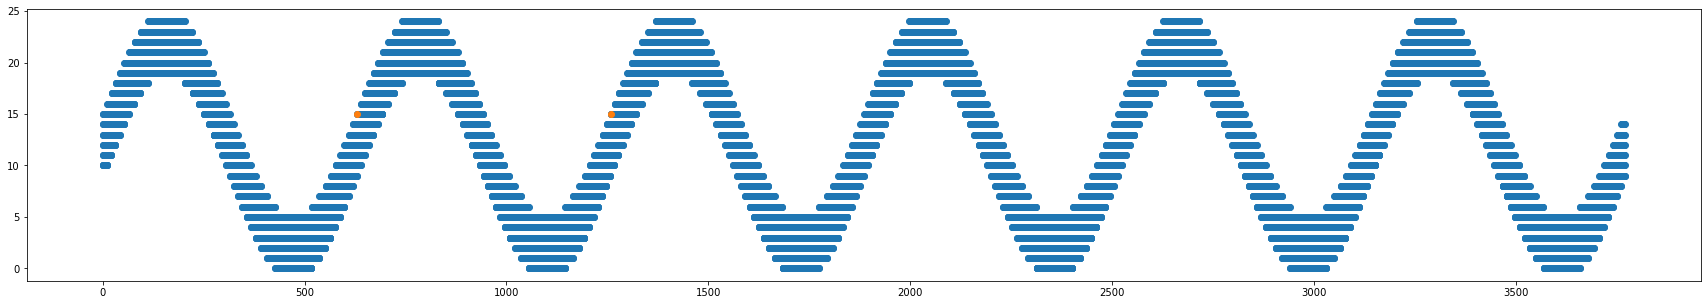

In [4]:
#make sinusoid of HD activity
diam = 6
sin = ((np.sin(np.arange(np.pi*1200)/100)+1)*10)//1
time = np.arange(1,len(sin)+1)
temp = []
temptime=[]
for i in range(diam):
    temp = np.append(temp,sin+i)
    temptime = np.append(temptime,time)
sin = np.append(sin,temp)
time = np.append(time,temptime)

plt.figure(figsize=(30, 5))
plt.scatter(time,sin)

N = int(np.max(sin))

a = 630
plt.scatter([a,a*2],[15,15])

In [5]:
HD = sim.Create("iaf_psc_alpha",N)
g1 = sim.Create("iaf_psc_alpha",N)
view = sim.Create("iaf_psc_alpha",5, params={"tau_minus": 30.0})


In [6]:
params=[]
for i in range(N):
    idx = np.where(sin == i)
    spktms = time[idx]
    params.append({'spike_times':np.sort(spktms)})
    
HD_spikes = sim.Create('spike_generator', N, params)
sim.Connect(HD_spikes,HD,'one_to_one',syn_spec={'weight': 500, 'delay': 0.1})

In [7]:
# view_current = sim.Create('ac_generator ', 5, params = [{'offset': 0.,'amplitude':595.,'frequency':1.6,'phase': 90.},
#                                                        {'offset': 0.,'amplitude':595.,'frequency':3.2,'phase': 180.},
#                                                        {'offset': 0.,'amplitude':595.,'frequency':1.6,'phase': 270.},
#                                                        {'offset': 0.,'amplitude':0.,'frequency':1.6,'phase': 90.},
#                                                        {'offset': 0.,'amplitude':0.,'frequency':1.6,'phase': 90.}])
# # iv_sin = sim.Create('ac_generator ', 1, params = {'offset': 300.,'amplitude':695.,'frequency':5.,'phase': 180.})

# sim.Connect(view_current,view,'one_to_one')


In [8]:
step = 50.
jump = a
I = 500.

v1 = 400.
v2 = 800.
v3 = 1200.
view_current = sim.Create('step_current_generator', 5, params = [{'amplitude_times':[v1,v1+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v2,v2+step],'amplitude_values':[I,0.0]},
                                                                {'amplitude_times':[v1,v1+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v2,v2+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v1,v1+step,v2,v2+step],'amplitude_values':[I,0.0,I,0.0]}])
sim.Connect(view_current,view,'one_to_one')

v1 = v1+jump
v2 = v2+jump
v3 = v3+jump
view_current2 = sim.Create('step_current_generator', 5, params = [{'amplitude_times':[v1,v1+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v2,v2+step],'amplitude_values':[I,0.0]},
                                                                {'amplitude_times':[v1,v1+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v2,v2+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v1,v1+step,v2,v2+step],'amplitude_values':[I,0.0,I,0.0]}])
sim.Connect(view_current2,view,'one_to_one')

v1 = v1+jump
v2 = v2+jump
v3 = v3+jump
view_current3 = sim.Create('step_current_generator', 5, params = [{'amplitude_times':[v1,v1+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v2,v2+step],'amplitude_values':[I,0.0]},
                                                                {'amplitude_times':[v1,v1+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v2,v2+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v1,v1+step,v2,v2+step],'amplitude_values':[I,0.0,I,0.0]}])
sim.Connect(view_current3,view,'one_to_one')

v1 = v1+jump
v2 = v2+jump
v3 = v3+jump
view_current4 = sim.Create('step_current_generator', 5, params = [{'amplitude_times':[v1,v1+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v2,v2+step],'amplitude_values':[I,0.0]},
                                                                {'amplitude_times':[v1,v1+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v2,v2+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v1,v1+step,v2,v2+step],'amplitude_values':[I,0.0,I,0.0]}])
sim.Connect(view_current4,view,'one_to_one')

v1 = v1+jump
v2 = v2+jump
v3 = v3+jump
view_current5 = sim.Create('step_current_generator', 5, params = [{'amplitude_times':[v1,v1+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v2,v2+step],'amplitude_values':[I,0.0]},
                                                                {'amplitude_times':[v1,v1+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v2,v2+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v1,v1+step,v2,v2+step],'amplitude_values':[I,0.0,I,0.0]}])
sim.Connect(view_current5,view,'one_to_one')

v1 = v1+jump
v2 = v2+jump
v3 = v3+jump
view_current5 = sim.Create('step_current_generator', 5, params = [{'amplitude_times':[v1,v1+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v2,v2+step],'amplitude_values':[I,0.0]},
                                                                {'amplitude_times':[v1,v1+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v2,v2+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v1,v1+step,v2,v2+step],'amplitude_values':[I,0.0,I,0.0]}])
sim.Connect(view_current5,view,'one_to_one')

v1 = v1+jump
v2 = v2+jump
v3 = v3+jump
view_current5 = sim.Create('step_current_generator', 5, params = [{'amplitude_times':[v1,v1+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v2,v2+step],'amplitude_values':[I,0.0]},
                                                                {'amplitude_times':[v1,v1+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v2,v2+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v1,v1+step,v2,v2+step],'amplitude_values':[I,0.0,I,0.0]}])
sim.Connect(view_current5,view,'one_to_one')

v1 = v1+jump
v2 = v2+jump
v3 = v3+jump
view_current5 = sim.Create('step_current_generator', 5, params = [{'amplitude_times':[v1,v1+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v2,v2+step],'amplitude_values':[I,0.0]},
                                                                {'amplitude_times':[v1,v1+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v2,v2+step,v3,v3+step],'amplitude_values':[I,0.0,I,0.0]},
                                                                {'amplitude_times':[v1,v1+step,v2,v2+step],'amplitude_values':[I,0.0,I,0.0]}])
sim.Connect(view_current5,view,'one_to_one')

sim_len = v3+500.

In [9]:
# sim.Connect(HD,g1, "one_to_one", syn_spec={'weight': 500, 'delay': 0.1})
sim.Connect(view,HD, "all_to_all", syn_dict)

In [10]:
HD_spikes = sim.Create("spike_detector", 1, params={"withgid": True,"withtime": True})
view_spikes = sim.Create("spike_detector", 1, params={"withgid": True,"withtime": True})

sim.Connect(HD,HD_spikes)
sim.Connect(view,view_spikes)


In [11]:
sim.Simulate(sim_len)

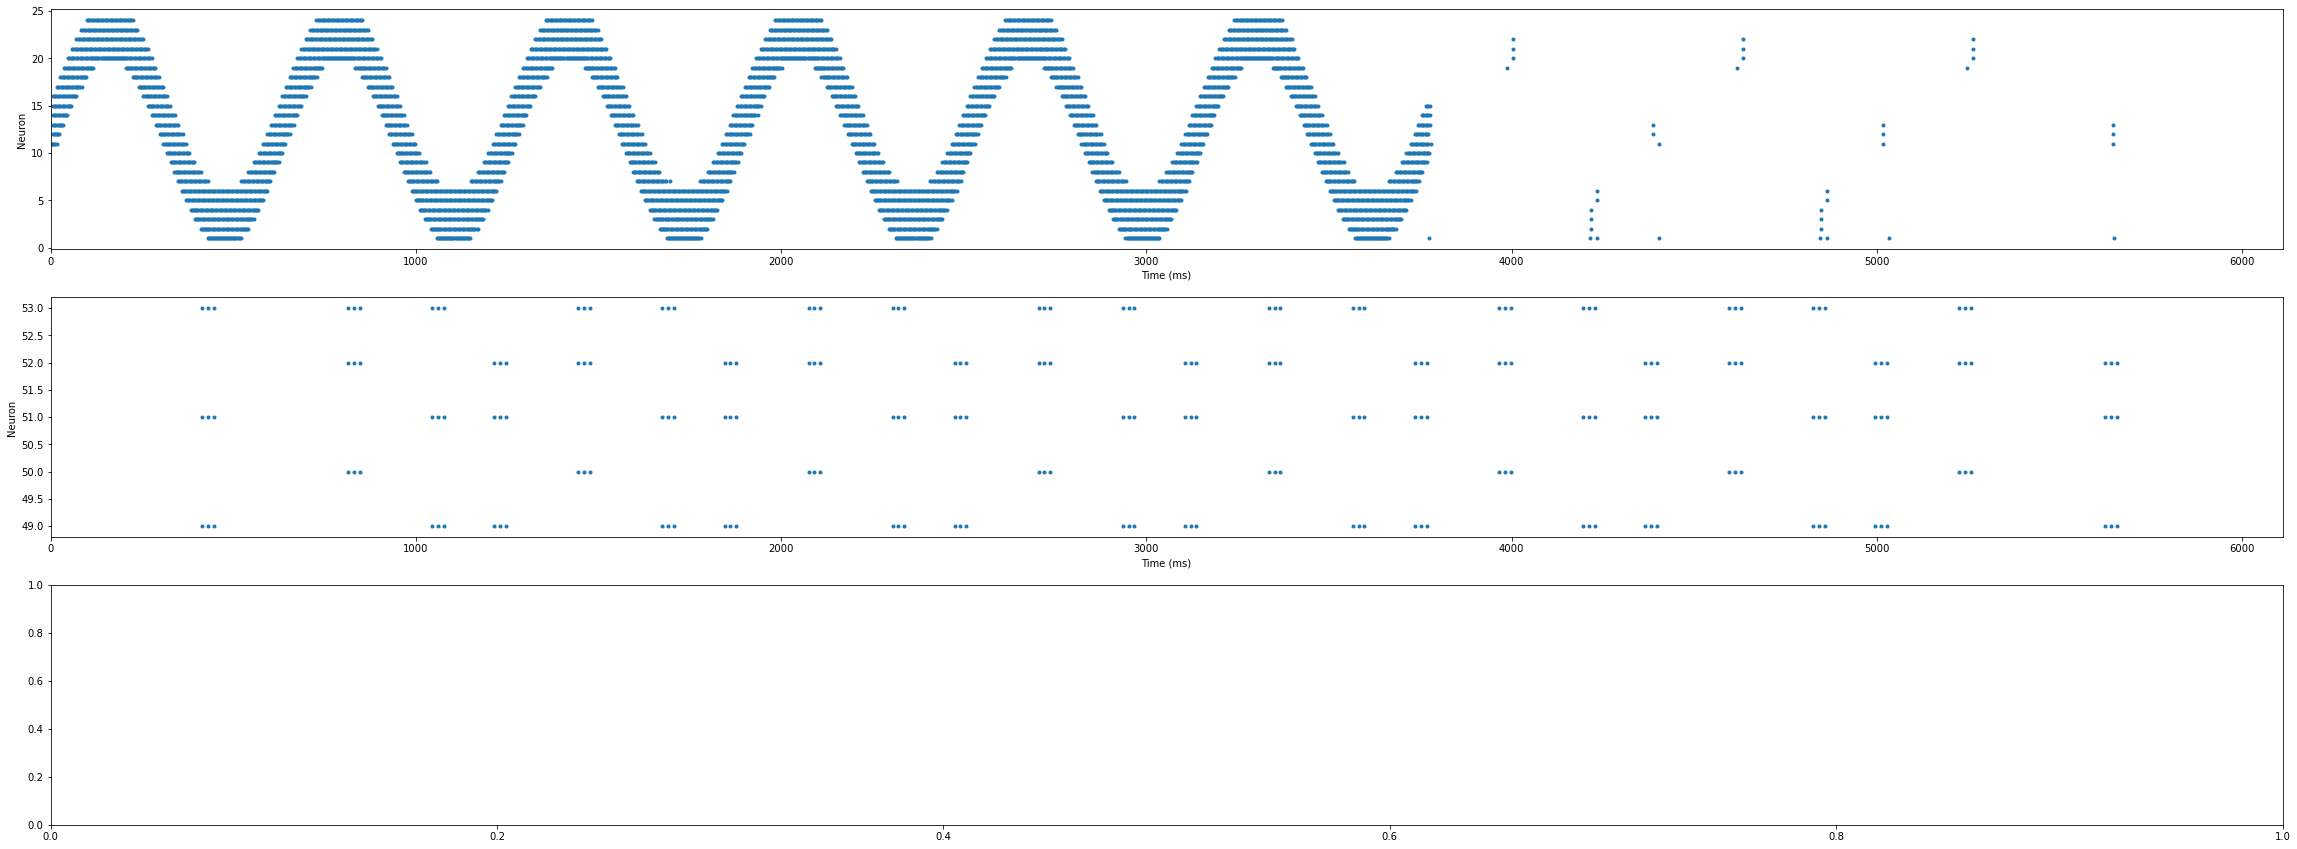

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(40, 15),facecolor='w')

ev = sim.GetStatus(HD_spikes)[0]['events']
t = ev['times']
sp = ev['senders']
plotSpks(ax1,t,sp)

ev = sim.GetStatus(view_spikes)[0]['events']
t = ev['times']
sp = ev['senders']
plotSpks(ax2,t,sp)